In [2]:
%matplotlib inline
from pymks.datasets import make_microstructure
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data_blob = make_microstructure(n_samples=34, size=(201, 201), n_phases=2, grain_size=(60, 60), volume_fraction=[0.5, 0.5])
data_lamellar_v = make_microstructure(n_samples=33, size=(201, 201), n_phases=2, grain_size=(200, 20), volume_fraction=[0.5, 0.5])
data_lamellar_h = make_microstructure(n_samples=33, size=(201, 201), n_phases=2, grain_size=(20, 200), volume_fraction=[0.5, 0.5])
data = np.concatenate([data_blob, data_lamellar_v, data_lamellar_h], axis=0)
letters = ['A'] * 34 + ['B'] * 33 + ['C'] * 33
perm = np.random.permutation(100)
data = data[perm]
letters = [letters[i] for i in perm]
#np.random.shuffle(data)

In [6]:
np.random.random()

0.748620022299658

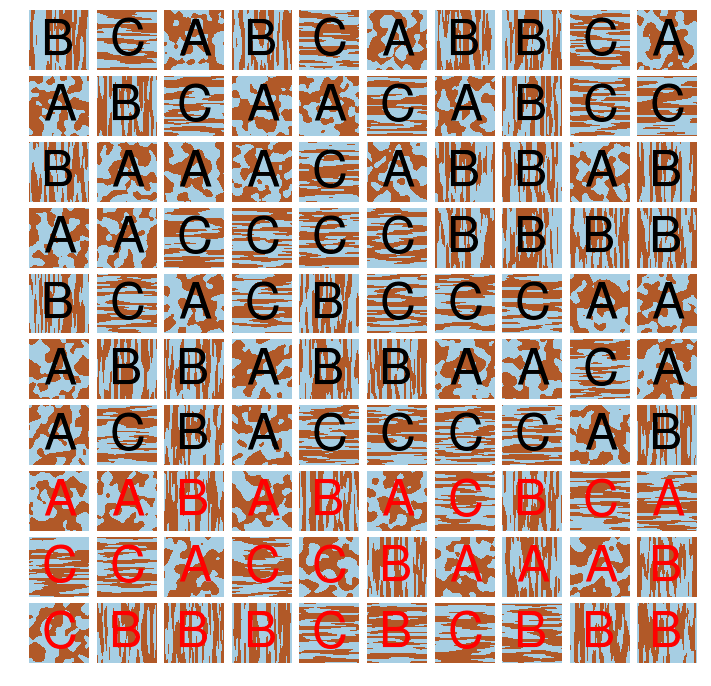

In [7]:
fig = plt.figure(figsize=(12, 12))
for i in range(10):
    for j in range(10):
        ii = i * 10 + j
        ax = fig.add_subplot(10, 10, ii + 1)
        ax.set_aspect('equal')
        if ii < 70:
            ax.text(50, 150, letters[ii],
                    fontsize=50,
                    color='black',
                    weight='heavy')
        else:
            if np.random.random() < 0.8:
                letter = letters[ii]
            elif np.random.random() < 0.33:
                letter = 'A'
            elif np.random.random() < 0.66:
                letter = 'B'
            else:
                letter = 'C'
            ax.text(50, 150, letter,
                    fontsize=50,
                    color='red',
                    weight='heavy')
        img = plt.imshow(data[ii])
        plt.axis('off')
        img.set_cmap('Paired')
        
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('array.png')

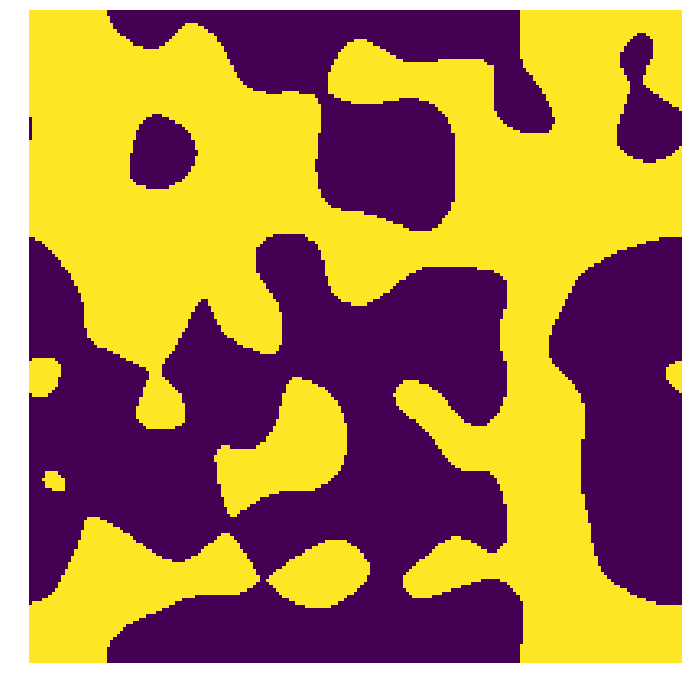

In [15]:
fig = plt.figure(figsize=(12, 12))
for i in range(1):
    for j in range(1):
        ii = i * 10 + j
        ax = fig.add_subplot(1, 1, ii + 1)
        ax.set_aspect('equal')
        img = plt.imshow(data[ii + 2])
        plt.axis('off')
        img.set_cmap('viridis')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('mat2.png')

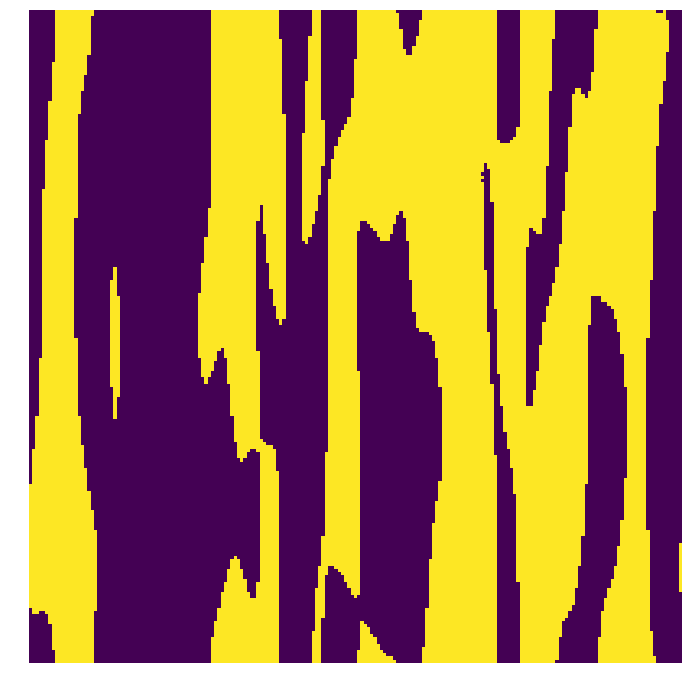

In [11]:
fig = plt.figure(figsize=(12, 12))
for i in range(1):
    for j in range(1):
        ii = i * 10 + j
        ax = fig.add_subplot(1, 1, ii + 1)
        ax.set_aspect('equal')
        img = plt.imshow(data[ii])
        plt.axis('off')
        img.set_cmap('viridis')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('mat1.png')

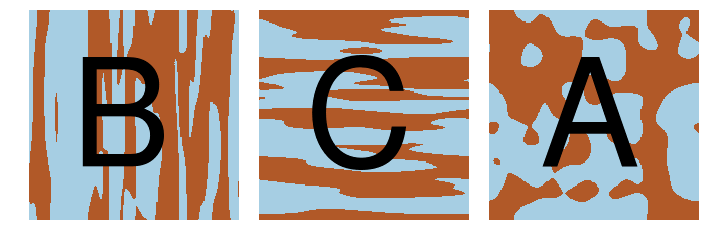

In [16]:
fig = plt.figure(figsize=(12, 12))
for i in range(1):
    for j in range(3):
        ii = i * 3 + j
        ax = fig.add_subplot(1, 3, ii + 1)
        ax.set_aspect('equal')
        ax.text(50, 150, letters[ii],
                fontsize=150,
                color='black',
                weight='heavy')
        
        img = plt.imshow(data[ii])
        plt.axis('off')
        img.set_cmap('Paired')
        
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('array.png')

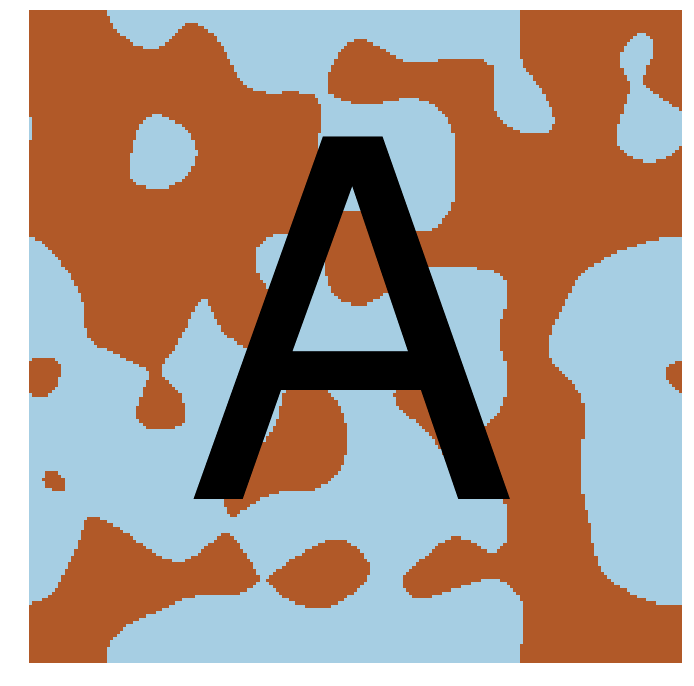

In [15]:
fig = plt.figure(figsize=(12, 12))
for i in range(1):
    for j in range(2, 3):
        ii = i * 3 + j
        ax = fig.add_subplot(1, 1, 1)
        ax.set_aspect('equal')
        ax.text(50, 150, letters[ii],
                    fontsize=500,
                    color='black',
                    weight='heavy')
        img = plt.imshow(data[ii])
        plt.axis('off')
        img.set_cmap('Paired')
        
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('array.png')

In [10]:
for i in range(2, 3):
    print(i)

2


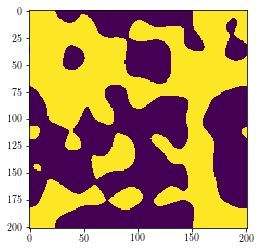

In [3]:
plt.imshow(data[2])

In [4]:
from pymks.datasets.elastic_FE_simulation import ElasticFESimulation

In [5]:
sim = ElasticFESimulation(elastic_modulus=(310.0, 200.0), poissons_ratio=(0.28, 0.3))

In [6]:
out = sim.run(data[2:3])

In [15]:
data[:1].shape

(1, 201, 201)

In [20]:
sim.strain.shape

(1, 201, 201, 3)

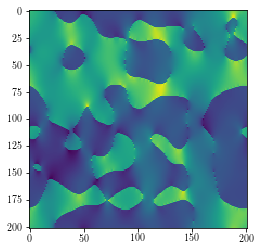

In [9]:
plt.imshow(sim.strain[0, :, : , 0])

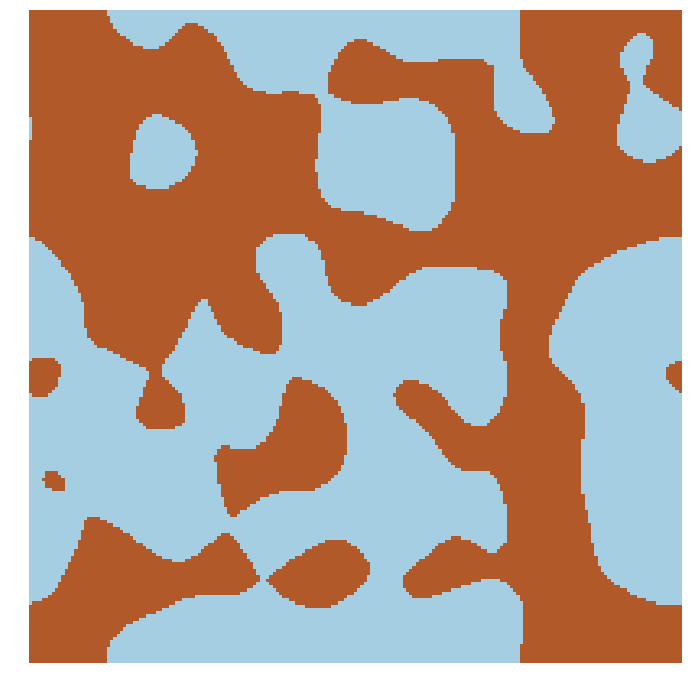

In [10]:
fig = plt.figure(figsize=(12, 12))
for i in range(1):
    for j in range(2, 3):
        ii = i * 3 + j
        ax = fig.add_subplot(1, 1, 1)
        ax.set_aspect('equal')
        img = plt.imshow(data[ii])
        plt.axis('off')
        img.set_cmap('Paired')
        
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('array.png')

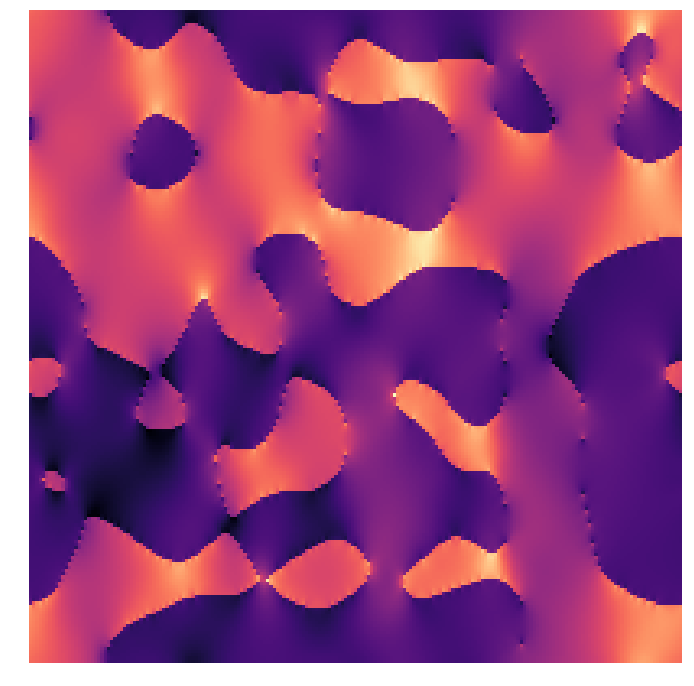

In [13]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
img = plt.imshow(sim.strain[0, :, :, 0])
plt.axis('off')
img.set_cmap('magma')
        
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('array.png')

In [60]:
from pymks.datasets.cahn_hilliard_simulation import CahnHilliardSimulation

In [61]:
dd = 2 * np.random.random((1, 101, 101)) - 1

In [62]:
dd.shape

(1, 101, 101)

In [109]:
dd_ini = 2 * np.random.random((25, 51, 51)) - 1
dd = dd_ini.copy()
sim = CahnHilliardSimulation(dt=0.01, dx=0.25, gamma=1.)
for i in range(100):
    sim.run(dd)
    dd = sim.response

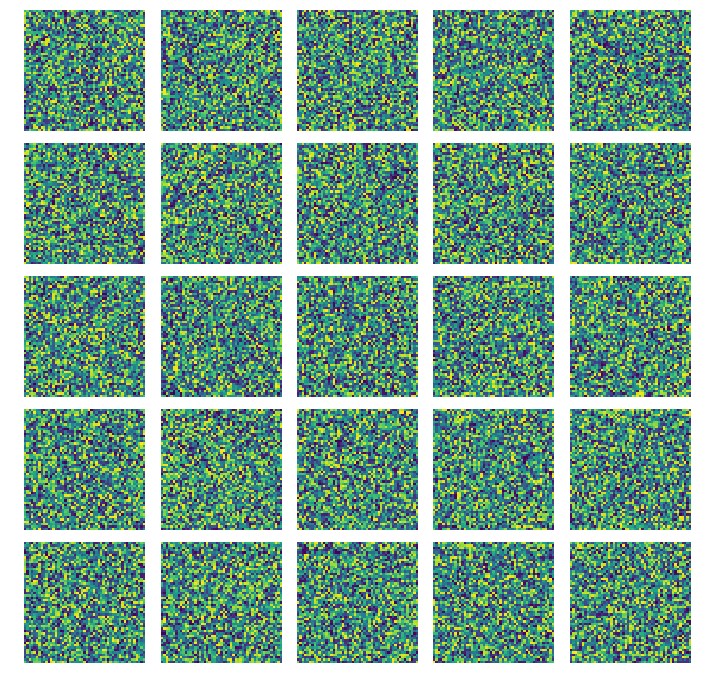

In [110]:
fig = plt.figure(figsize=(12, 12))
for i in range(5):
    for j in range(5):
        ii = i * 5 + j
        ax = fig.add_subplot(5, 5, ii + 1)
        ax.set_aspect('equal')
        img = plt.imshow(dd_ini[ii])
        plt.axis('off')
        img.set_cmap('viridis')
        
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('random.png')

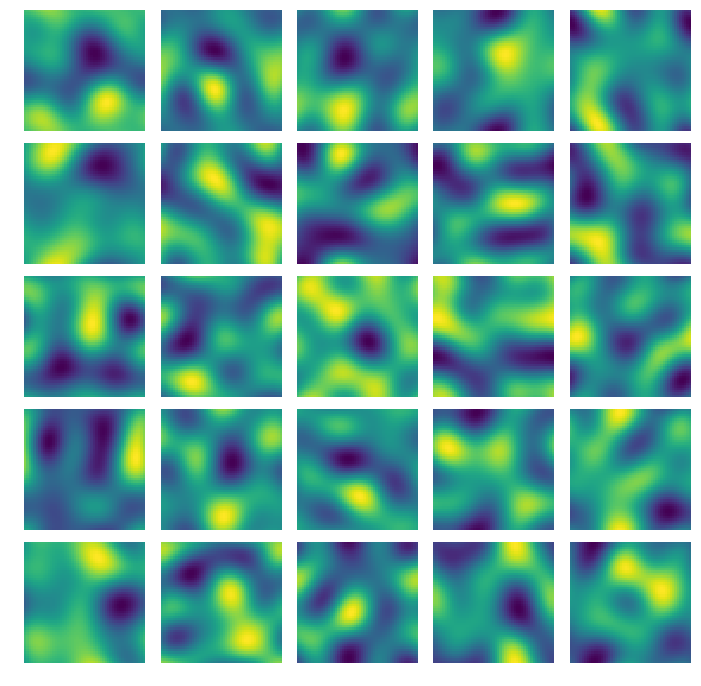

In [103]:
fig = plt.figure(figsize=(12, 12))
for i in range(5):
    for j in range(5):
        ii = i * 5 + j
        ax = fig.add_subplot(5, 5, ii + 1)
        ax.set_aspect('equal')
        img = plt.imshow(dd[ii])
        plt.axis('off')
        img.set_cmap('viridis')
        
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('random.png')

In [104]:
dd_ini = 2 * np.random.random((1, 301, 301)) - 1
dd = dd_ini.copy()
sim = CahnHilliardSimulation(dt=0.01, dx=0.25, gamma=1.)
for i in range(100):
    sim.run(dd)
    dd = sim.response

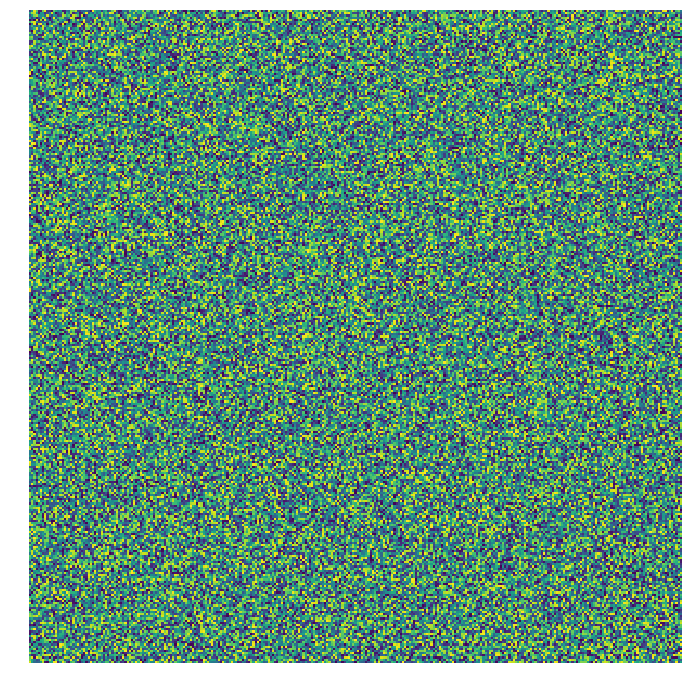

In [107]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
img = plt.imshow(dd_ini[0])
plt.axis('off')
img.set_cmap('viridis')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('big0.png')

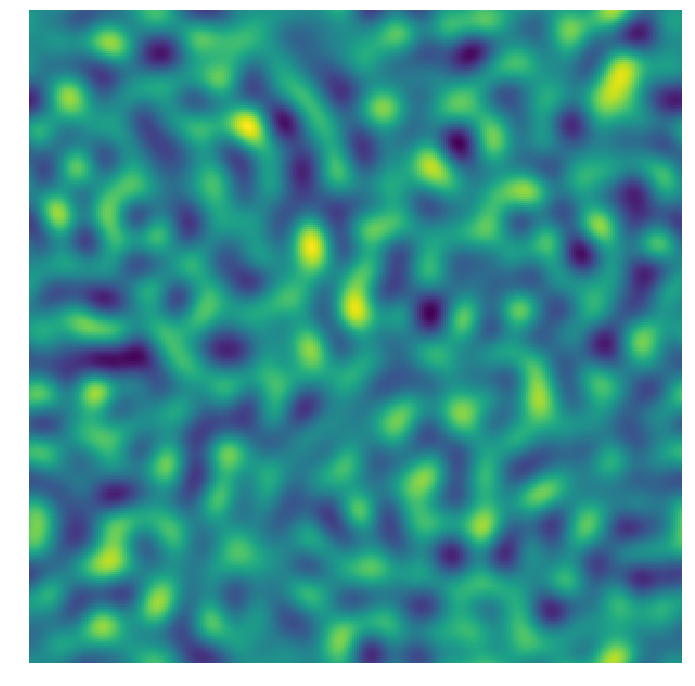

In [108]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
img = plt.imshow(dd[0])
plt.axis('off')
img.set_cmap('viridis')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('big1.png')

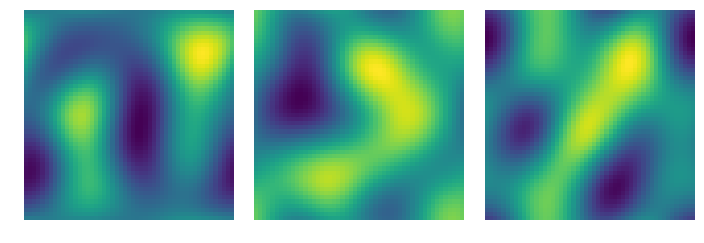

In [111]:
fig = plt.figure(figsize=(12, 12))
for i in range(1):
    for j in range(3):
        ii = i * 3 + j
        ax = fig.add_subplot(1, 3, ii + 1)
        ax.set_aspect('equal')
        img = plt.imshow(dd[ii])
        plt.axis('off')
        img.set_cmap('viridis')
        
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('random.png')

In [147]:
dd_ini = 2 * np.random.random((1, 301, 301)) - 1
dd = dd_ini.copy()
sim = CahnHilliardSimulation(dt=0.1, dx=0.25, gamma=1.)
for i in range(500):
    sim.run(dd)
    dd = sim.response

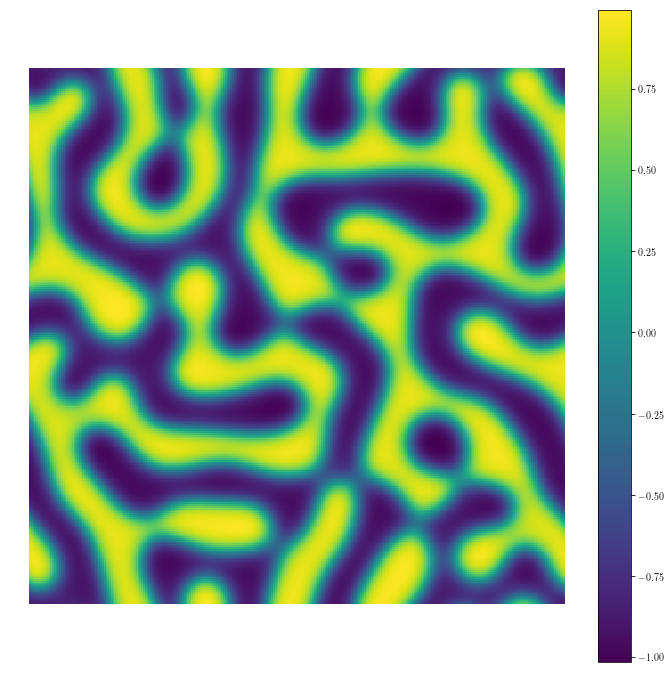

In [148]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
img = plt.imshow(dd[0])
plt.axis('off')
img.set_cmap('viridis')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('data.png')
plt.colorbar()

In [149]:
from pymks.bases.primitive import PrimitiveBasis

In [152]:
from pymks.bases import PrimitiveBasis
basis = PrimitiveBasis(n_states=3, domain=[np.min(dd), np.max(dd)])

out = basis.discretize(dd)

In [153]:
dd.shape

(1, 301, 301)

In [154]:
out.shape

(1, 301, 301, 3)

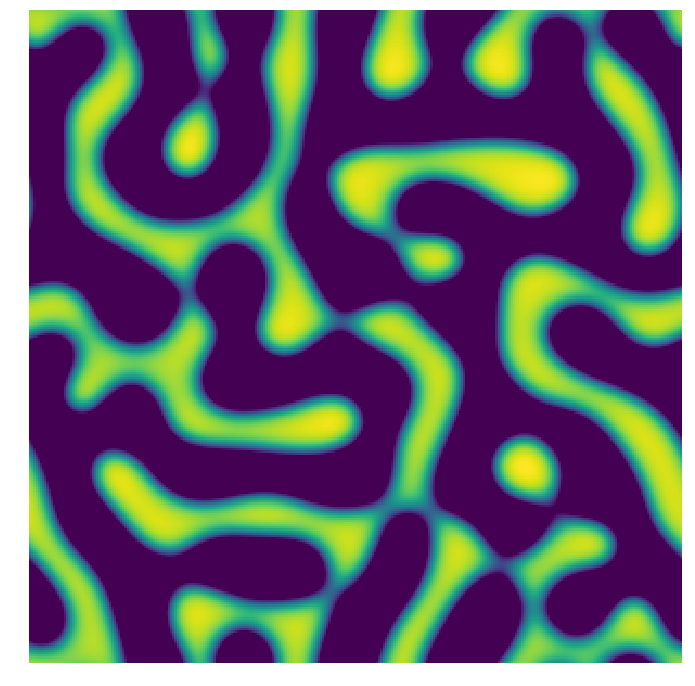

In [155]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
img = plt.imshow(out[0, :, :, 0])
plt.axis('off')
img.set_cmap('viridis')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('channel1.png')

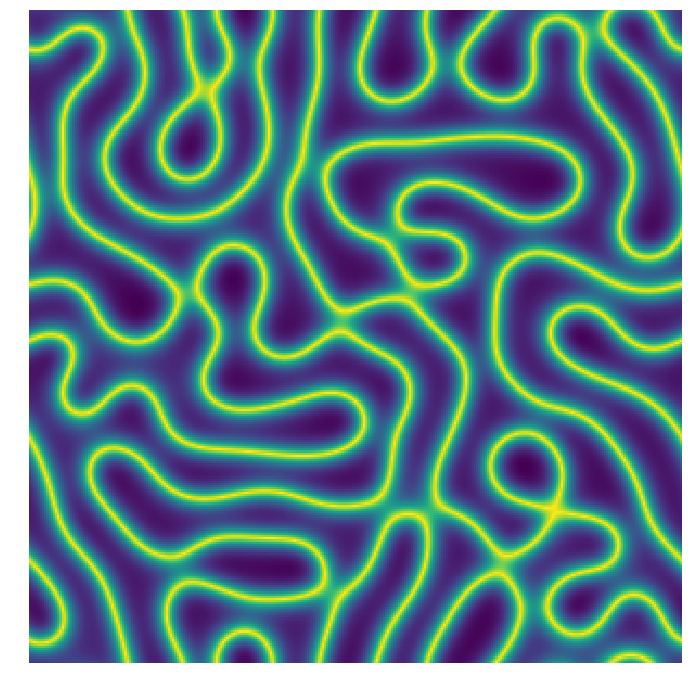

In [156]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
img = plt.imshow(out[0, :, :, 1])
plt.axis('off')
img.set_cmap('viridis')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('channel2.png')

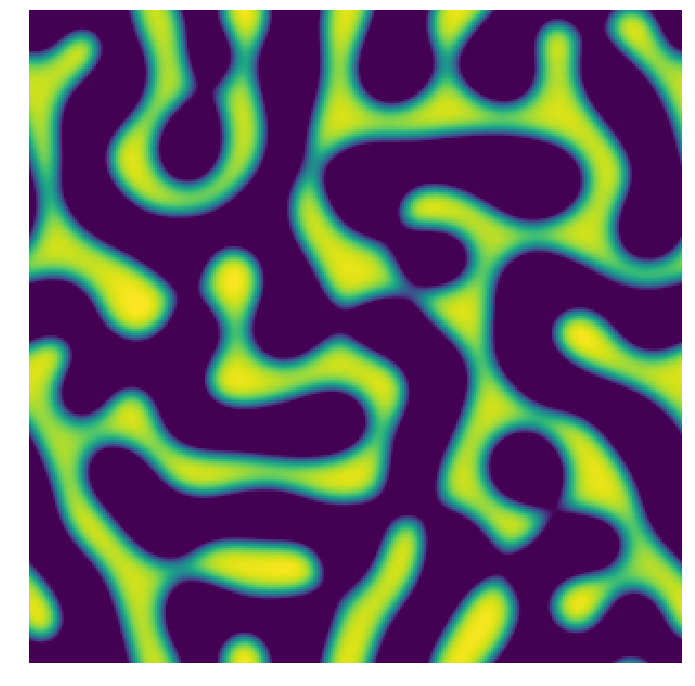

In [157]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
img = plt.imshow(out[0, :, :, 2])
plt.axis('off')
img.set_cmap('viridis')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('channel3.png')

In [158]:
from pymks.stats import correlate

data_corr = correlate(dd, basis=basis)

In [159]:
data_corr.shape

(1, 301, 301, 6)

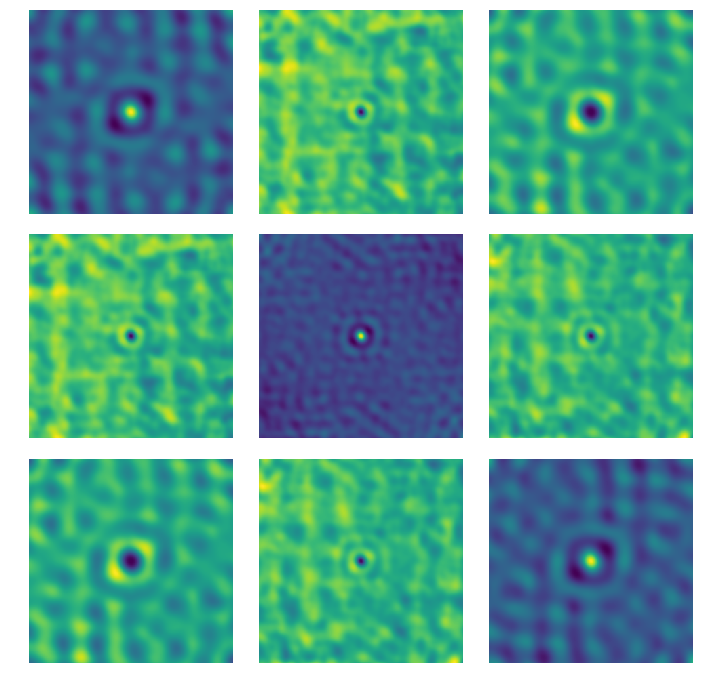

In [164]:
fig = plt.figure(figsize=(12, 12))
for i in range(3):
    for j in range(3):
        ii = i * 3 + j
        ax = fig.add_subplot(3, 3, ii + 1)
        ax.set_aspect('equal')
        if i == j:
            im = data_corr[0, :, :, i]
        else:
            
            im = data_corr[0, :, :, 2 + i + j]
        img = plt.imshow(im)
        plt.axis('off')
        img.set_cmap('viridis')
        
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('stats.png')

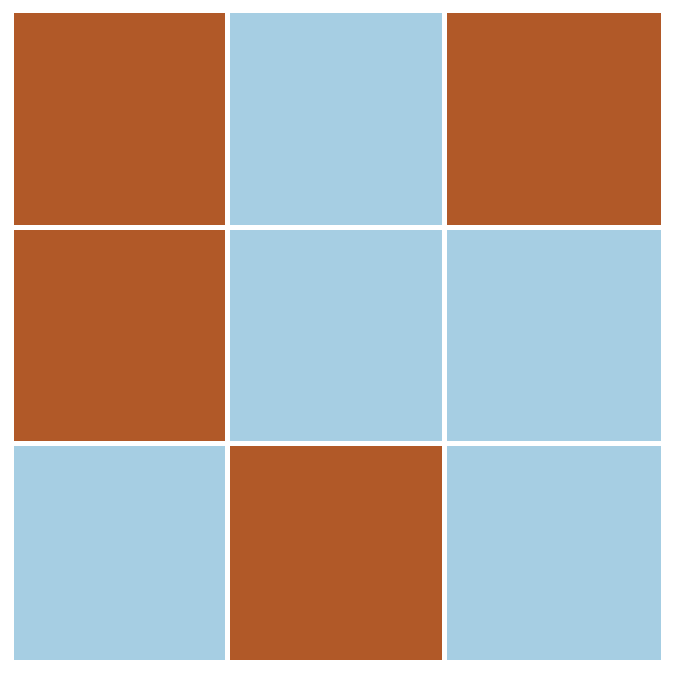

In [44]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
img = plt.imshow(np.array([[1, 0, 1], [1, 0, 0], [0, 1, 0]]))
plt.axis('on')
img.set_cmap('Paired')
ax.grid(which='major', color='w', linestyle='-', linewidth=5)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax.set_xticks([-0.5, 0.5, 1.5, 2.51])
ax.set_yticks([-0.5, 0.5, 1.5, 2.51])
ax.set_xticklabels(['', '', '', ''])
ax.set_yticklabels(['', '', '', ''])
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('grid.png')

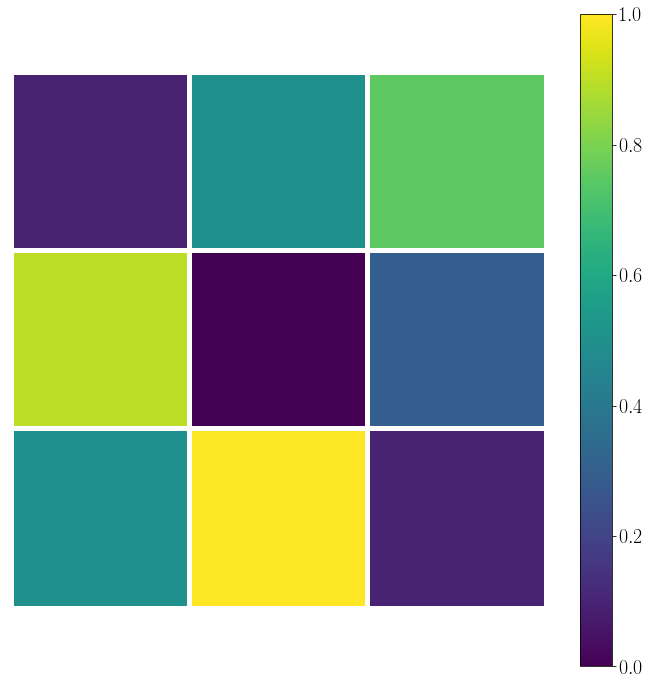

In [7]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
img = plt.imshow(np.array([[0.1, 0.5, .75], [0.9, 0, 0.3], [0.5, 1.0, 0.1]]))
plt.axis('on')
img.set_cmap('viridis')
ax.grid(which='major', color='w', linestyle='-', linewidth=5)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax.set_xticks([-0.5, 0.5, 1.5, 2.51])
ax.set_yticks([-0.5, 0.5, 1.5, 2.51])
ax.set_xticklabels(['', '', '', ''])
ax.set_yticklabels(['', '', '', ''])
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.savefig('grid.png')

[ 0.   0.   0.4  0.6  0. ]


/home/wd15/miniconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


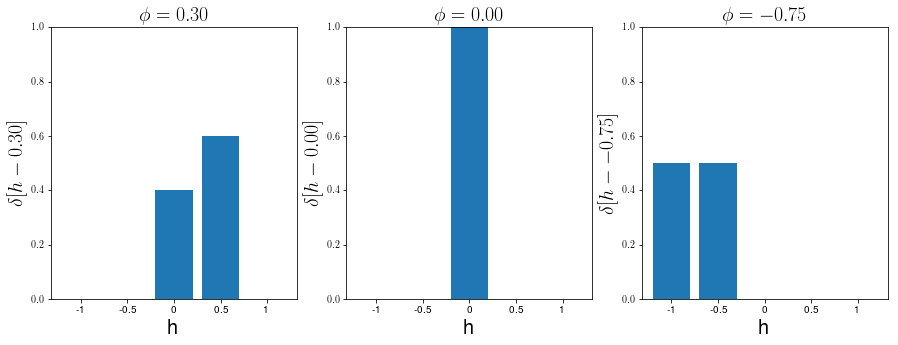

In [1]:
# NBVAL_IGNORE_OUTPUT

%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

def delta_func(x, dh):
    return np.maximum(1 - abs(x) / dh, 0)

hs = np.array([-1., -0.5, 0, 0.5, 1])

phi = 0.3

print(delta_func(hs - phi, 0.5))
f, axs = plt.subplots(1, 3)
f.set_size_inches((15, 5))

for ax, phi in zip(axs, [0.3, 0.0, -0.75]):
    ax.bar(np.arange(len(hs)), delta_func(hs - phi, 0.5))
    ax.set_xticklabels(['', '-1', '-0.5', '0', '0.5', '1'])
    ax.set_ylabel('$\delta[h - {0:.2f}]$'.format(phi), fontsize=20)
    ax.set_xlabel('h', fontsize=20)
    ax.set_ylim([0, 1])
    ax.set_title('$\phi={0:.2f}$'.format(phi), fontsize=20)
f.show()

plt.savefig('mf.png')

# $$ p_j[s] = \sum_{r \in S} \sum_{h \in H} \alpha[h; s] m_j[h; s + r] $$

## $$ \phi_j[s](t=t_0) \rightarrow \phi_j[s](t=t_{10})$$

We will do lots of simulations to create the "response", $\phi_j[s](t=t_{10})$ from the "microstructure" (i.e. lots of random initial conditions), $\phi_j[s](t=t_0)$.

## $$ p_j[s] = \phi_j[s](t=t_{10}) $$

## $$ m_j[s; h] = \delta[h - \phi_j[s]] $$

Calculating the regression in Frequency space drastically reduces the computational cost. The size of the regression is reduced from $ \left(N_S N_{\text{sample}} \times N_S H \right)$ to $\left(N_{\text{sample}} \times H \right)$ for each point in reciprocal space $N_S$. The convolution,

$$ \mathcal{F}_k \left( \sum\limits_{r \in S} \sum\limits_{h \in H} \alpha [h; s] m_j [h; s + r] \right) =
 \sum\limits_{h=0}^{H-1} \left[ \left[ \mathcal{F}_k \left( \alpha [h;s] \right) \right]^* \mathcal{F}_k \left( m_j [h; s + r] \right) \right] $$